<a href="https://colab.research.google.com/github/Elberth-Git/ml_car_prices/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color =Yellow> Importação dos dados

In [26]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Elberth-Git/ml_car_prices/main/car-prices.csv' #importação do banco de dados via URL
df = pd.read_csv(url) # Carregando os dados
print(df)

display(df)

      Unnamed: 0  mileage_per_year  model_year      price sold
0              0             21801        2000   30941.02  yes
1              1              7843        1998   40557.96  yes
2              2              7109        2006   89627.50   no
3              3             26823        2015   95276.14   no
4              4              7935        2014  117384.68  yes
...          ...               ...         ...        ...  ...
9995        9995             15572        2006   97112.86   no
9996        9996             13246        2002  107424.63  yes
9997        9997             13018        2014   93856.99   no
9998        9998             10464        2011   51250.57  yes
9999        9999             12362        1999   87945.73   no

[10000 rows x 5 columns]


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [27]:
map = {
    'mileage_per_year': 'kilometragem',
    'model_year': 'ano_do_modelo',
    'price': 'preço',
    'sold': 'vendido',
}

dados = df.rename(columns=map)

# Mapeamento de 'yes' e 'no' para 1 e 0 na coluna 'vendido'
dados['vendido'] = dados['vendido'].map({'yes': 1, 'no': 0})

display(dados)

#df = df.rename(columns=map)
#df = df.rename(columns=yes_no_map)
#display(df)

,Unnamed: 0,kilometragem,ano_do_modelo,preço,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [28]:
from datetime import datetime as datatime

ano_atual = datatime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,kilometragem,ano_do_modelo,preço,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [29]:
dados['km_por_ano'] = dados.kilometragem * 1.60934
dados.head()

,Unnamed: 0,kilometragem,ano_do_modelo,preço,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,24,35085.22134
1,1,7843,1998,40557.96,1,26,12622.05362
2,2,7109,2006,89627.50,0,18,11440.79806
3,3,26823,2015,95276.14,0,9,43167.32682
4,4,7935,2014,117384.68,1,10,12770.11290


In [30]:
dados = dados.drop(columns=['Unnamed: 0', 'kilometragem', 'ano_do_modelo'], axis=1)
dados.head()

,preço,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,24,35085.22134
1,40557.96,1,26,12622.05362
2,89627.50,0,18,11440.79806
3,95276.14,0,9,43167.32682
4,117384.68,1,10,12770.11290


Balanceamento dos dados:

In [31]:
dados.vendido.value_counts()

vendido
1    5800
0    4200
Name: count, dtype: int64

In [32]:
df.shape

(10000, 5)

In [18]:
# Separando os recursos (X) e a variável alvo (y)
X = dados[['km_por_ano', 'idade_do_modelo', 'preço' ]]  # Seleciona as colunas 'home', 'how_it_works' e 'contact' como recursos (X)
y = dados['vendido']  # Seleciona a coluna 'bought' como a variável alvo (y)

## <font color =Yellow> SEPARAÇÃO DE TREINO E TESTE

In [33]:
from sklearn.model_selection import train_test_split # Importando a biblioteca para separação de dados

#SEPARAR TREINO E TESTE
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


# <font color =Yellow> Modelos

### <font color = Orange> Modelo Linear SVC

In [34]:
train_y.value_counts()

vendido
1    4350
0    3150
Name: count, dtype: int64

In [36]:
from sklearn.svm import LinearSVC # Importando o modelo LinearSVC

model = LinearSVC()  # Cria uma instância do modelo LinearSVC

# Criando o modelo LinearSVC
model = LinearSVC()  # Cria uma instância do modelo LinearSVC

# Treinando o modelo com os dados de treinamento
model.fit(train_x, train_y)  # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
result = model.predict(test_x)  # Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

previsoes = model.predict(train_x)

acuracia_model_score = model.score(test_x, test_y) * 100

print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )

Acurácia do modelo: 61.20 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### <font color = Orange> DUMMY BASELINE

In [37]:
from sklearn.dummy import DummyClassifier

dummy_stratifield = DummyClassifier() #Cria modelo
dummy_stratifield.fit(train_x, train_y) #Treina modelo
dummy_stratifield.score(test_x, test_y) #Avalia modelo

acuracia_dummy = dummy_stratifield.score(test_x, test_y) * 100
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

A Acurácia do modelo dummy stratifield foi de 58.00 %


In [38]:
print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )  # Imprime a acurácia formatada como uma porcentagem com duas casas decimais)
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

Acurácia do modelo: 61.20 %
A Acurácia do modelo dummy stratifield foi de 58.00 %


### <font color = Orange> Modelo SVC

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # Importando a função para separar os dados em conjuntos de treinamento e teste
from sklearn.svm import SVC # Importando o modelo de Machine Learning (LinearSVC)
from sklearn.metrics import accuracy_score

# Separando os dados em conjuntos de treinamento e teste
#SEPARAR TREINO E TESTE
raw_train_x, raw_test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

# Padronizando os dados
scaler = StandardScaler()
train_x = scaler.fit_transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

# Criando o modelo LinearSVC
model_ = SVC(gamma="auto", random_state=42)  # Cria uma instância do modelo LinearSVC

# Treinando o modelo com os dados de treinamento
model.fit(train_x, train_y)  # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
result = model.predict(test_x)  # Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

previsoes = model.predict(train_x)
acuracia_model_score = model.score(test_x, test_y) * 100

print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 70.12 %


## <font color = Yellow>  Árvore de decisão

### <font color = Orange> Modelo Linear SVC

In [ ]:
train_y.value_counts()

vendido
1    4350
0    3150
Name: count, dtype: int64

In [56]:
from sklearn.svm import LinearSVC # Importando o modelo LinearSVC
from sklearn.tree import DecisionTreeClassifier # Importando o modelo DecisionTreeClassifier
import numpy as np

SEED = 42
np.random.seed(SEED)

# Separando os dados em conjuntos de treinamento e teste
#SEPARAR TREINO E TESTE

#SEPARAR TREINO E TESTE
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25,random_state=42, stratify=y)
print(f"Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

model = DecisionTreeClassifier(random_state=SEED, max_depth=3)  # Cria uma instância do modelo de árvore de decisão

# Treinando o modelo com os dados de treinamento
model.fit(train_x, train_y) # Treina o modelo usando os dados de treinamento (train_x, train_y)

# Fazendo previsões para o conjunto de teste
result = model.predict(test_x)  # Utiliza o modelo treinado para fazer previsões para o conjunto de teste (test_x)

previsoes = model.predict(train_x)

acuracia_model_score = model.score(test_x, test_y) * 100

print(f'Acurácia do modelo: {acuracia_model_score:.2f} %' )

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Acurácia do modelo: 78.04 %


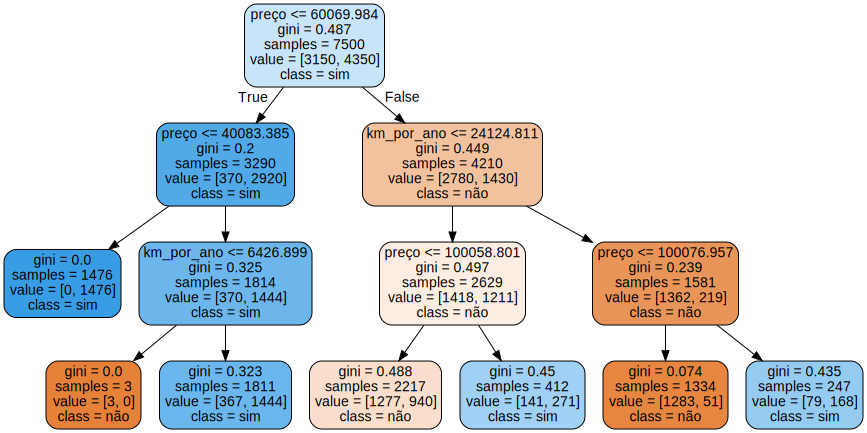

In [57]:
from sklearn.tree import DecisionTreeClassifier # Importando o modelo DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

features = X.columns
dot_data = export_graphviz(model, out_file=None, feature_names=features, filled=True, rounded=True, class_names= ['não', 'sim'])
graph = graphviz.Source(dot_data)
graph

In [59]:
#previsão utilizando

carro = [70000, 3, 20000]
model.predict([carro])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])